In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data_kmeans.csv')
data

,x1,x2
0,1.569817,0.848136
1,1.105569,4.215156
2,2.391312,2.846846
3,3.592822,0.430072
4,0.421655,3.004404
...,...,...
3995,8.478732,7.323632
3996,8.697735,5.378331
3997,7.586503,6.997685
3998,6.117095,7.541591


# Exploración:

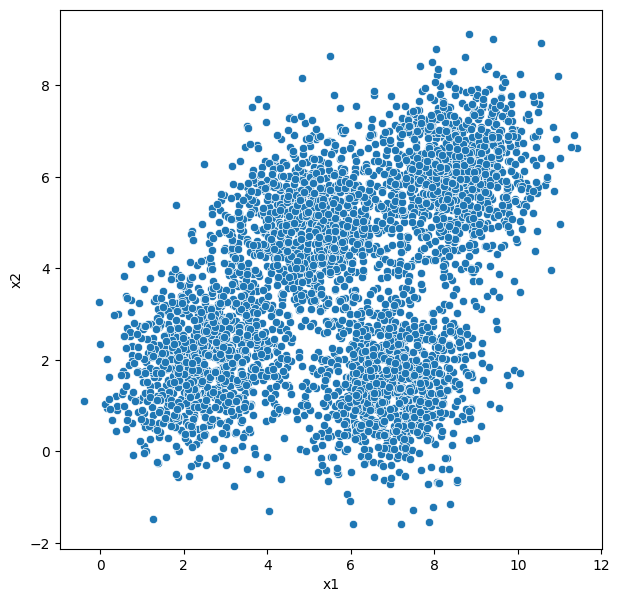

In [4]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='x1',y='x2')
plt.show()

# Entrenamiento:

In [5]:
class KMeans:
    
    def __init__(self,k,iterations=50,seed=7):
        self.k = k
        self.iterations = iterations
        self.seed = seed
        
    def fit(self,data):
        self.data = data
        centers = self.__setCenters()
        for _ in range(self.iterations):
            self.__assignClusters(centers)
            updatedCenters=self.__updateCenters()
            centers=updatedCenters
        self.centers = centers
        return self
        
    def __setCenters(self):
        return pd.DataFrame(self.data).sample(self.k,random_state=self.seed).values
    
    def __assignClusters(self,centers):
        df = pd.DataFrame()
        for i in range(self.k):
            df[i] = np.linalg.norm(self.data-centers[i],axis=1)
        self.clusters = df.idxmin(axis=1).values
    
    def __updateCenters(self):
        df = pd.DataFrame(self.data)
        df['clusters'] = self.clusters
        return df.groupby('clusters').mean().values 
      
    def predict(self,inputData):
        return np.array([np.argmin(np.linalg.norm(data-self.centers,axis=1)) for data in inputData])

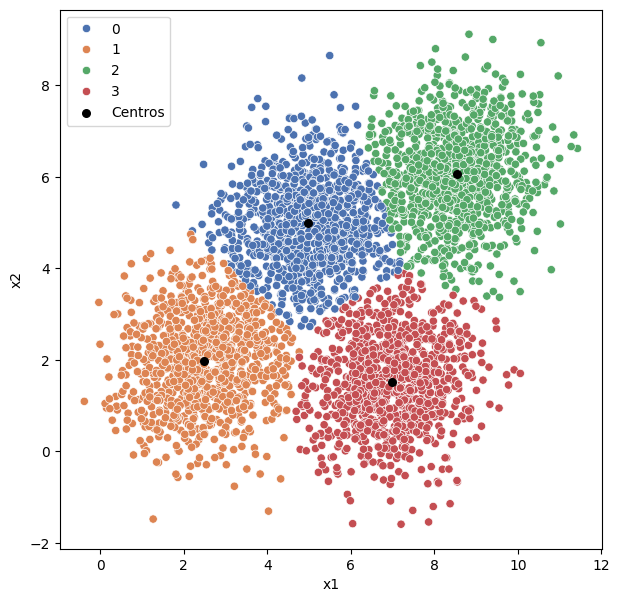

In [6]:
kmeans = KMeans(k=4,seed=10).fit(data[['x1','x2']].values)
data['cluster'] = kmeans.clusters
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='x1',y='x2',hue='cluster', palette="deep")
plt.scatter(kmeans.centers[:,0],kmeans.centers[:,1], label='Centros', color='k',s=30)
plt.legend()
plt.show()

# Evaluar modelo:

In [7]:
kmeans.predict(np.array([[0, 0], [8, 2]]))

array([1, 3])

# Scikit Learn

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data.loc[:,['x1','x2']].values)
kmeans.cluster_centers_

array([[6.99299547, 1.52244971],
       [8.54215671, 6.07409768],
       [2.48610202, 1.98804325],
       [4.98872198, 4.98457119]])

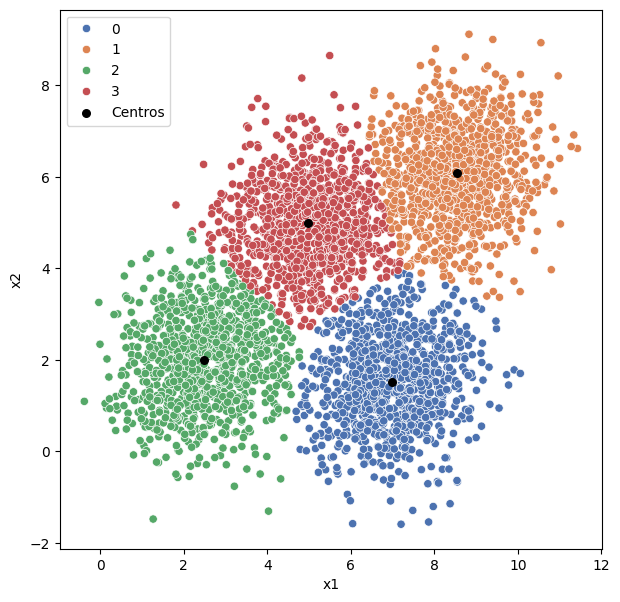

In [10]:
data['cluster'] = kmeans.labels_
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='x1',y='x2',hue='cluster', palette="deep")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label='Centros', color='k',s=30)
plt.legend()
plt.show()